### Cena 4
- Simulação com a mini câmara com material sendo um fluido equivalente.




### Importando bibliotecas


In [52]:
# Importando bibliotecas

import femder as fd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from femder.FEM_3D import  p2SPL

### Importando resultados experimentais
- velocidade de volume
- coef. absorção ISO 354
- sinal medido nos receptores
- respostas impulsivas

In [83]:
import scipy.io as sio

# q = sio.loadmat(r'G:\\Meu Drive\\TCC\\Simulacao_computacional\\Qi.mat') 
# sorted(q.keys())
# q = sio.loadmat(r'C:\\Users\\kemer\\Documents\\CaixasAcusticas\\diafragma_altofalante_Eric_Paulo_Eletroacustica\\Qi_150_600_1.mat')
#q = sio.loadmat(r'C:\\Users\\kemer\\Documents\\CaixasAcusticas\\diafragma_altofalante_Eric_Paulo_Eletroacustica\\Qi_601_1k_1.mat')
q = sio.loadmat(r'C:\\Users\\kemer\\Documents\\CaixasAcusticas\\diafragma_altofalante_Eric_Paulo_Eletroacustica\\Qi_1k_2k_1.mat')
q = q['Qi']

as_medido = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_maior\\a_s.mat')
# sorted(as_medido.keys())

R_comMat = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_maior\\pts_freq.mat')
# sorted(R_semMat.keys())

RI_comMat = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_maior\\RIs.mat')



In [68]:
q[0,0]

(3.8216096916880535e-05-0.00017333480860583317j)

### Importar geometria, inicializando as classes dos dados de entrada da simulação

In [81]:
np.argwhere(R_comMat['freqVector'][:,0]==500)

array([[6650]], dtype=int64)

In [84]:
# Importar geometria, inicializando as classes dos dados de entrada da simulação

path_to_geo = "G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\material_maisEspesso\minicamara_modificada_fonte_volmat2.geo"

AP = fd.AirProperties(c0 = 343)
fmax = 2000 #2300
fmin = 1001
AC = fd.AlgControls(AP,fmin,fmax,1)
S = fd.Source("spherical")
S.coord = np.array([[1.23,0.14,0.1]])
S.q = np.array(q.ravel())
R = fd.Receiver()
#R.coord = np.array([[0.33,0.23,0.21],[0.38,0.93,0.21],[0.92,0.95,0.21]]) 
R.coord = np.array([[1.057,0.695,0.282],[0.425,0.925,0.235],
                    [0.409,0.406,0.235],[0.336,0.677,0.282],
                    [0.685,0.965,0.235],[0.661,0.30,0.235]])
 

In [85]:

# Boundary Conditions
BC = fd.BC(AC,AP) #[2,3,4,5,6,7]
BC.delany(1,RF=12100, model='miki');
# BC.normalized_admittance([3,4,5,6,7,9,10,11,12,13,14],0.004)
#BC.normalized_admittance(14,0.004)
BC.normalized_admittance([9,10,11,12,13,14,15,16,17,18,19],0.004)
#BC.delany(7,RF=12100, d=0.025, model='miki')

### Verificação da equivalência entre os alphas (in x recuperado)

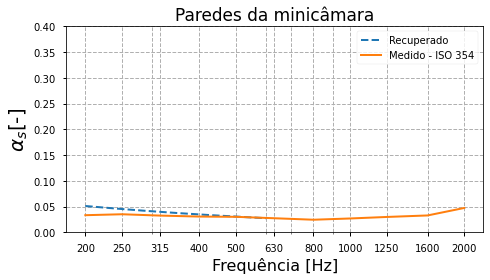

In [44]:
# Verificação da equivalência entre os coefs 
## () analisar recuperando com alphas em bando de terç de oitava
## () calcular erro entre os coefs

plt.figure(figsize=(7,4))
plt.semilogx(AC.freq, sup.statistical_alpha,label='Recuperado', linestyle='--', linewidth=2)
plt.semilogx(as_medido['f'][:11], as_medido['a_s'][:11], linestyle='-', label = 'Medido - ISO 354',linewidth=2)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.title('Paredes da minicâmara', fontsize=17)
plt.xlabel('Frequência [Hz]', fontsize=16)
plt.ylabel(r'$\alpha_{s}$[-]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
plt.tight_layout()
plt.ylim((0,0.4))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
plt.show()

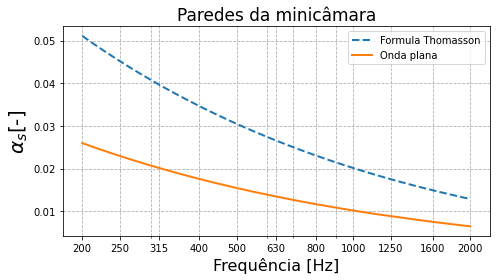

In [28]:
# Coeficiente de reflexão e absorção formula incidencia normal
z_ar = AP.c0*AP.rho0
Zs = sup_surface_impedance/z_ar
Reflexao = (Zs - 1) / (Zs + 1)
Absorcao = 1 - (np.abs(Reflexao) ** 2)  # 1 - |R|²
plt.figure(figsize=(7,4))
plt.semilogx(AC.freq, sup.statistical_alpha,label='Formula Thomasson', linestyle='--', linewidth=2)
plt.semilogx(AC.freq, Absorcao, linestyle='-', label = 'Incidência normal',linewidth=2)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.title('Paredes da minicâmara', fontsize=17)
plt.xlabel('Frequência [Hz]', fontsize=16)
plt.ylabel(r'$\alpha_{s}$[-]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
plt.tight_layout()
# plt.ylim((0,0.2))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
plt.show()

### Geração da malha, inicializando a classe FEM3D com os dados de entrada e o plote da geomeria com a malha 2D


In [86]:
grid = fd.GridImport3D(AP,path_to_geo,S,R,fmax = fmax,num_freq=6,scale=1000,order=1,load_method='meshio')
obj = fd.FEM3D(grid,S,R,AP,AC,BC)
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

### Cálculo das pressões com o método de elementos finitos

In [87]:
obj.compute() # debug e comparar vel const e dpendente freqa


FEM | Assembling surface matrix: 100%|█████████████████████████| 11/11 [00:00<00:00, 66.44it/s]
100%|██████████| 1000/1000 [9:18:43<00:00, 33.52s/it]


Time taken: 558.7439521312714 min


In [ ]:
q[0].ravel()

In [88]:
# Salva var
import pickle
with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_1001_2k_1.pkl", "wb") as arquivo:
    pickle.dump(obj, arquivo)

In [2]:
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

### Plote dos NPS resultantes em cada receptor

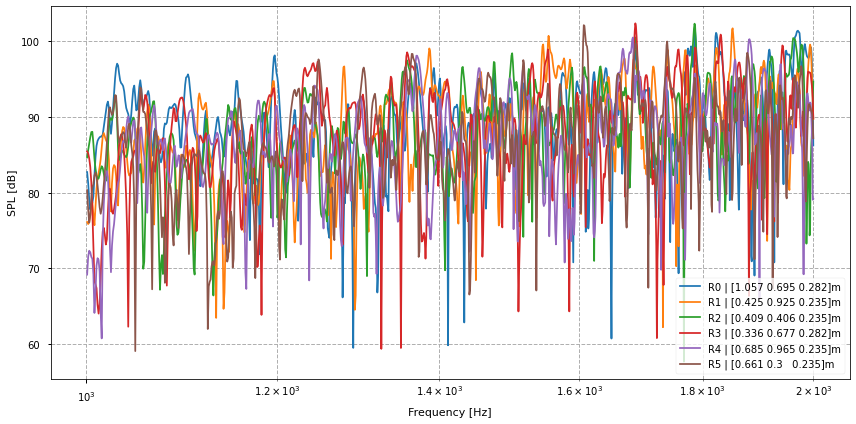

In [89]:

obj.evaluate(R)
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj.R.coord)==1:
  plt.semilogx(obj.freq, p2SPL(obj.pR), linestyle='-', label=f'R | {obj.R.coord[0]}m')
else:
  for i in range(len(obj.R.coord)):
      plt.semilogx(obj.freq, p2SPL(obj.pR[:,i]), linestyle='-', label=f'R{i} | {obj.R.coord[i,:]}m')

if len(obj.R.coord) > 1:
  pR_med = np.mean(obj.pR,axis=1)
  #plt.semilogx(obj.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
#plt.title('SEM MATERIAL')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

### Comparação NPS dos pontos medido e simulado

In [90]:
np.argwhere(R_comMat['freqVector']==2000)

array([[26600,     0]], dtype=int64)

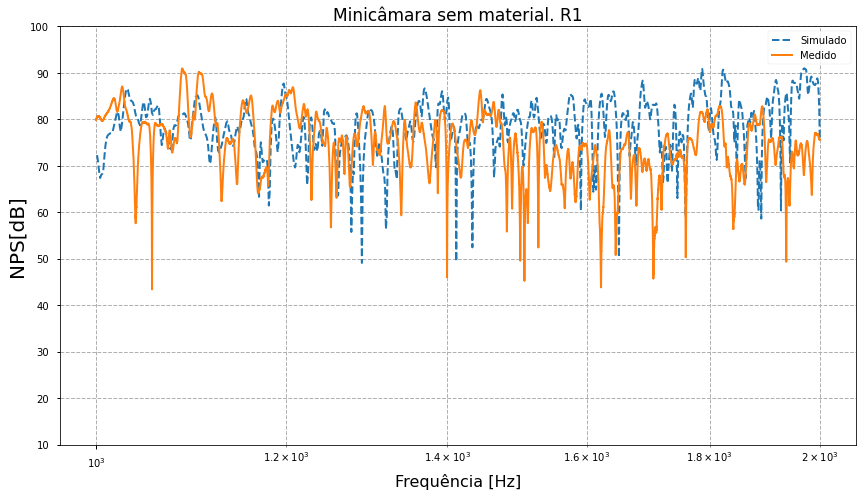

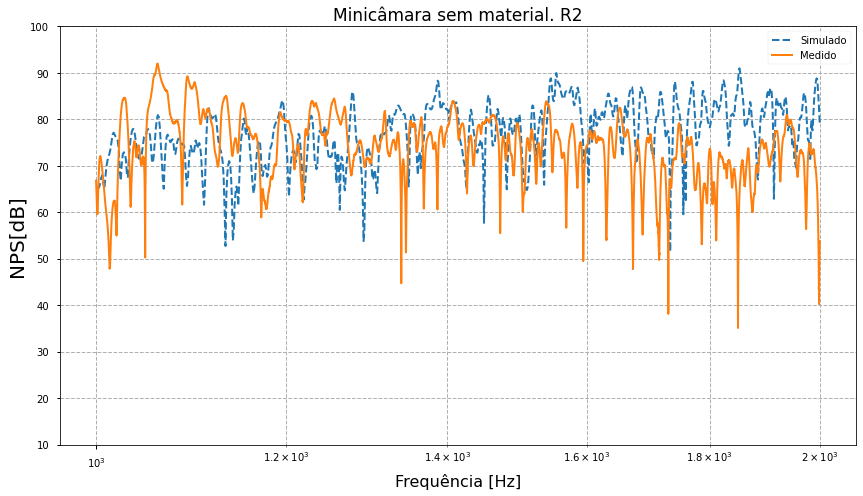

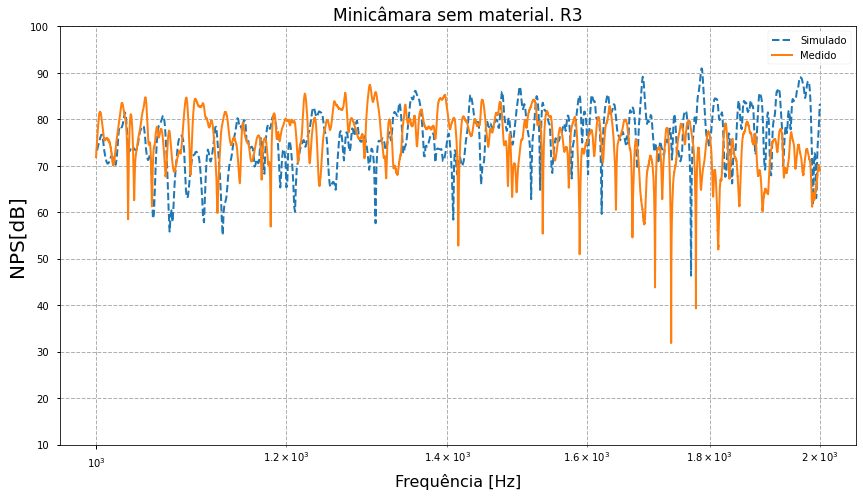

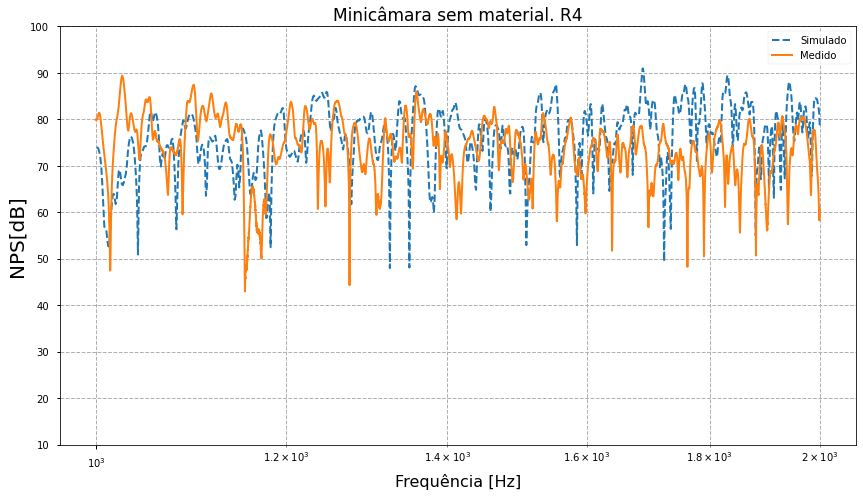

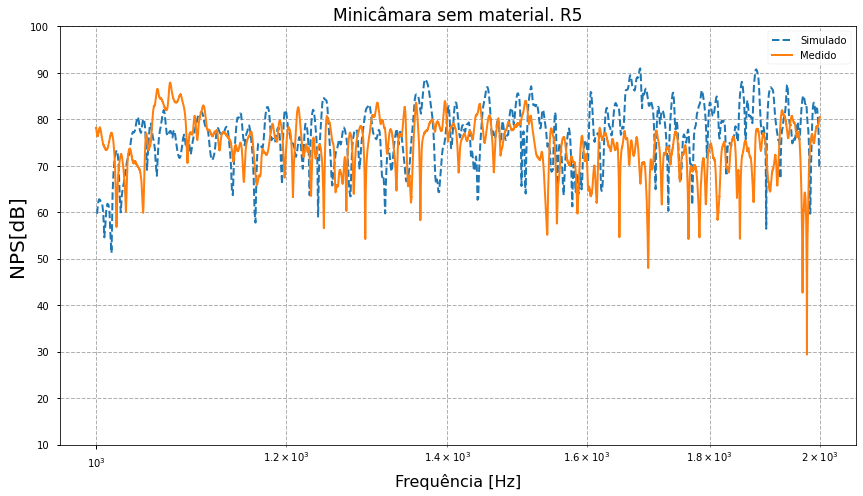

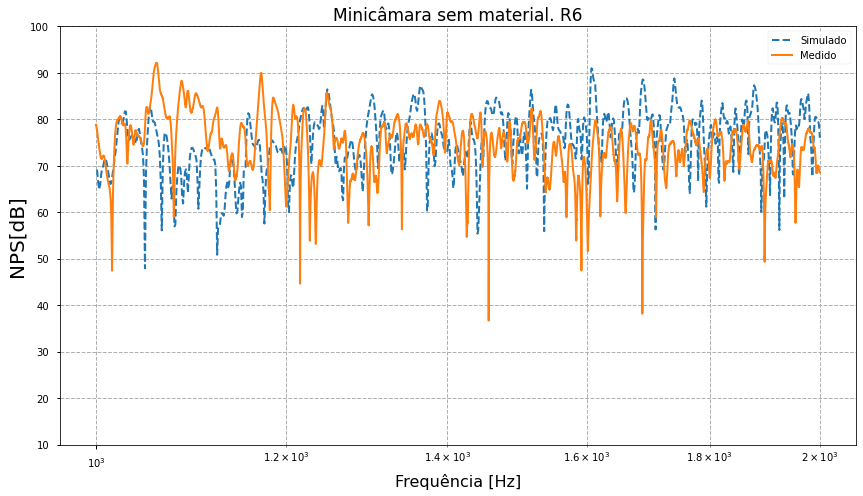

In [91]:
for n in range(0,6):
    plt.figure(figsize=(12,7))
    plt.semilogx(AC.freq, p2SPL(obj.pR[:,n]/max(abs(obj.pR[:,n]))),label='Simulado', linestyle='--', linewidth=2)
    plt.semilogx(R_comMat['freqVector'][13300:26600,0], p2SPL(R_comMat['pts_freq'][13300:26600,n]/max(abs(R_comMat['pts_freq'][13300:26600,0]))), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara sem material. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.ylim((0,0.2))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show()  

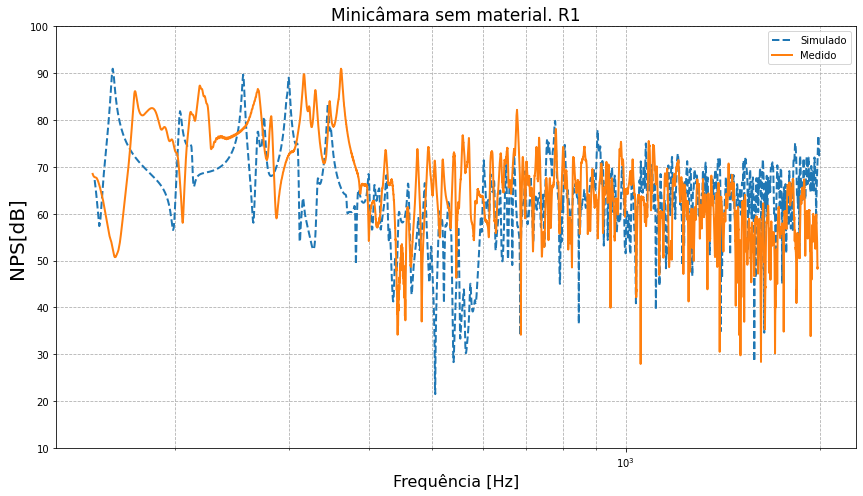

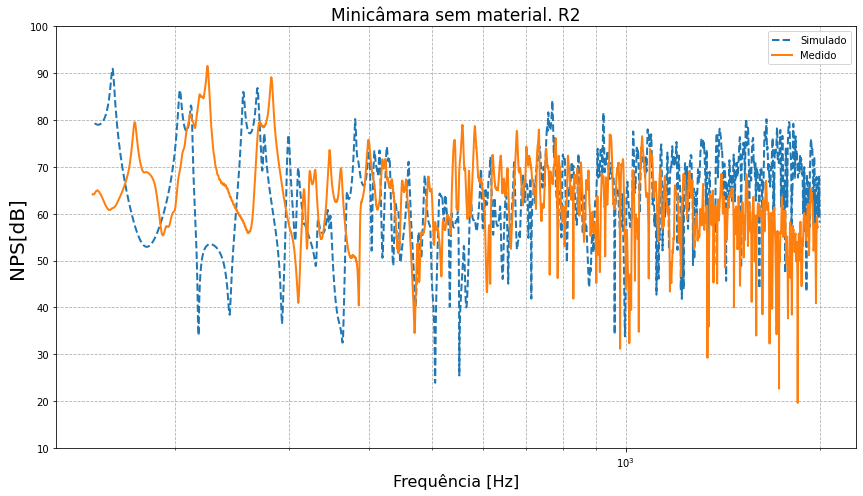

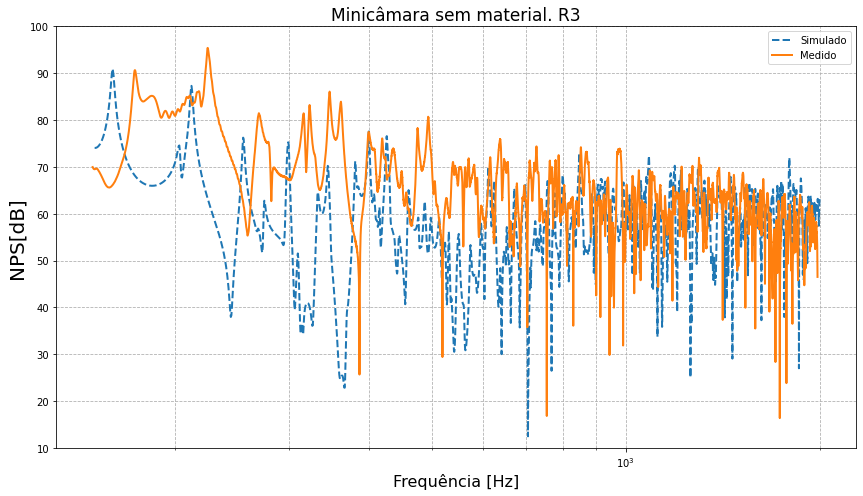

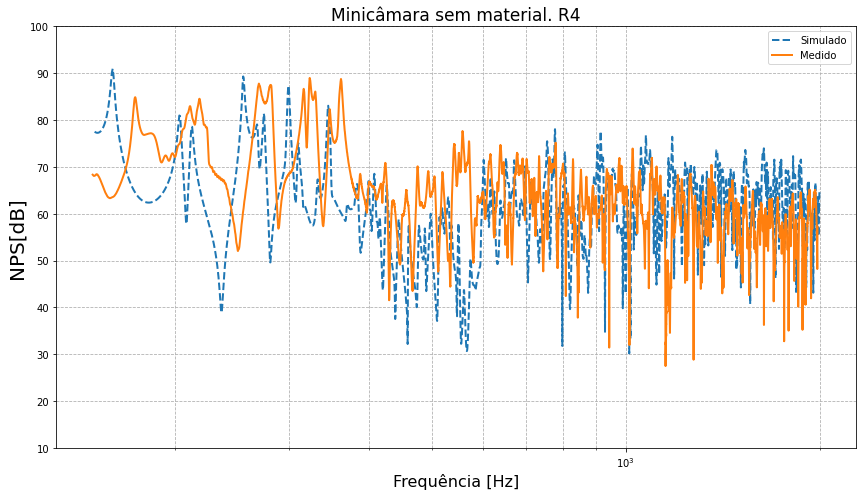

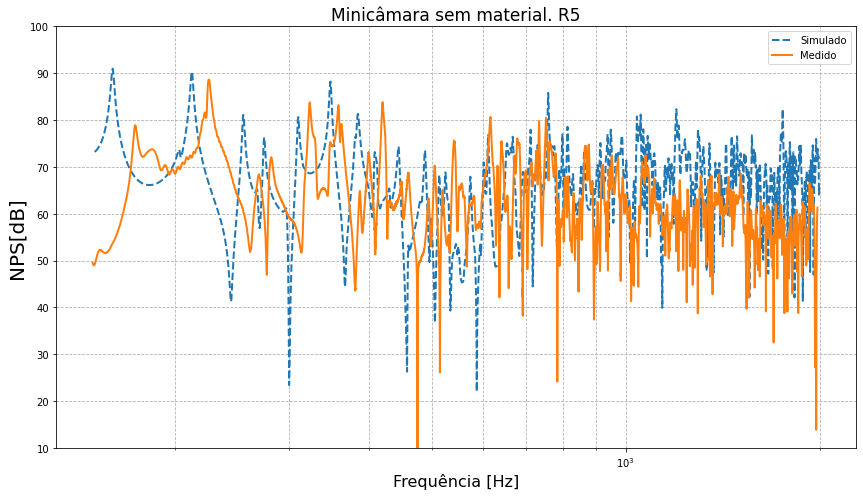

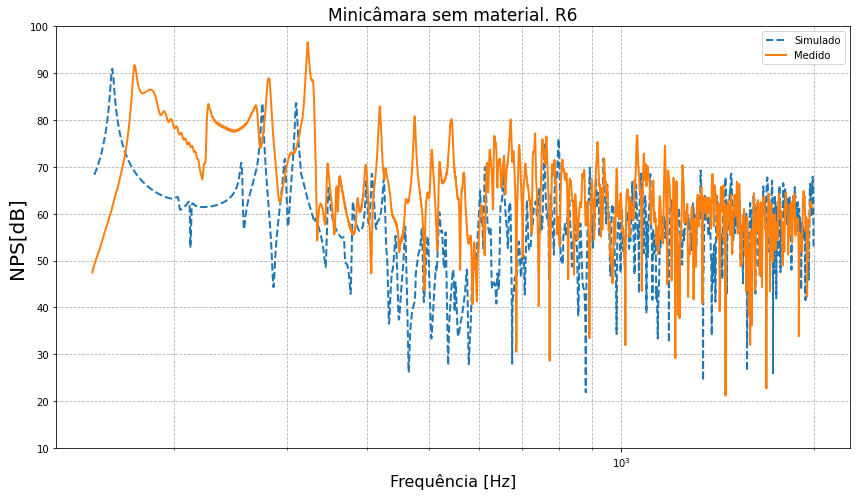

In [ ]:
#Comparação NPS dos pontos medido e simulado  
# Q - Dependente da freq

for n in range(0,6):
    plt.figure(figsize=(12,7))
    plt.semilogx(AC.freq, p2SPL(obj.pR[:,n]/max(abs(obj.pR[:,n]))),label='Simulado', linestyle='--', linewidth=2)
    plt.semilogx(R_semMat['freqVector'][1981:26401,0], p2SPL(R_semMat['pts_freq'][1981:26401,n]/max(abs(R_semMat['pts_freq'][2641:7921,0]))), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara sem material. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.ylim((0,0.2))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show()  

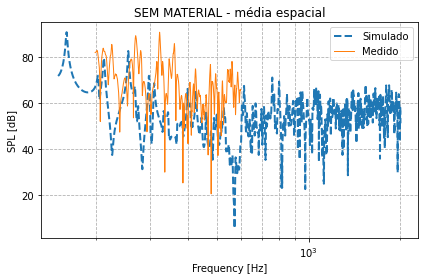

In [ ]:
plt.title('SEM MATERIAL - média espacial')
pR_med = np.mean(obj.pR,axis=1) # R_semMat['R_semMatfreq'][2641:7921,n]
R_med = np.mean(R_semMat['pts_freq'][2641:7921],axis=1)
plt.semilogx(obj.freq, p2SPL(pR_med/max(abs(pR_med))), linestyle='--', label='Simulado', linewidth=2)
plt.semilogx(R_semMat['freqVector'][2641:7921,0], p2SPL(R_med/max(abs(R_med))), linestyle='-', label='Medido', linewidth=1)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
# plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

### Comparação RIs dos pontos medido e simulado

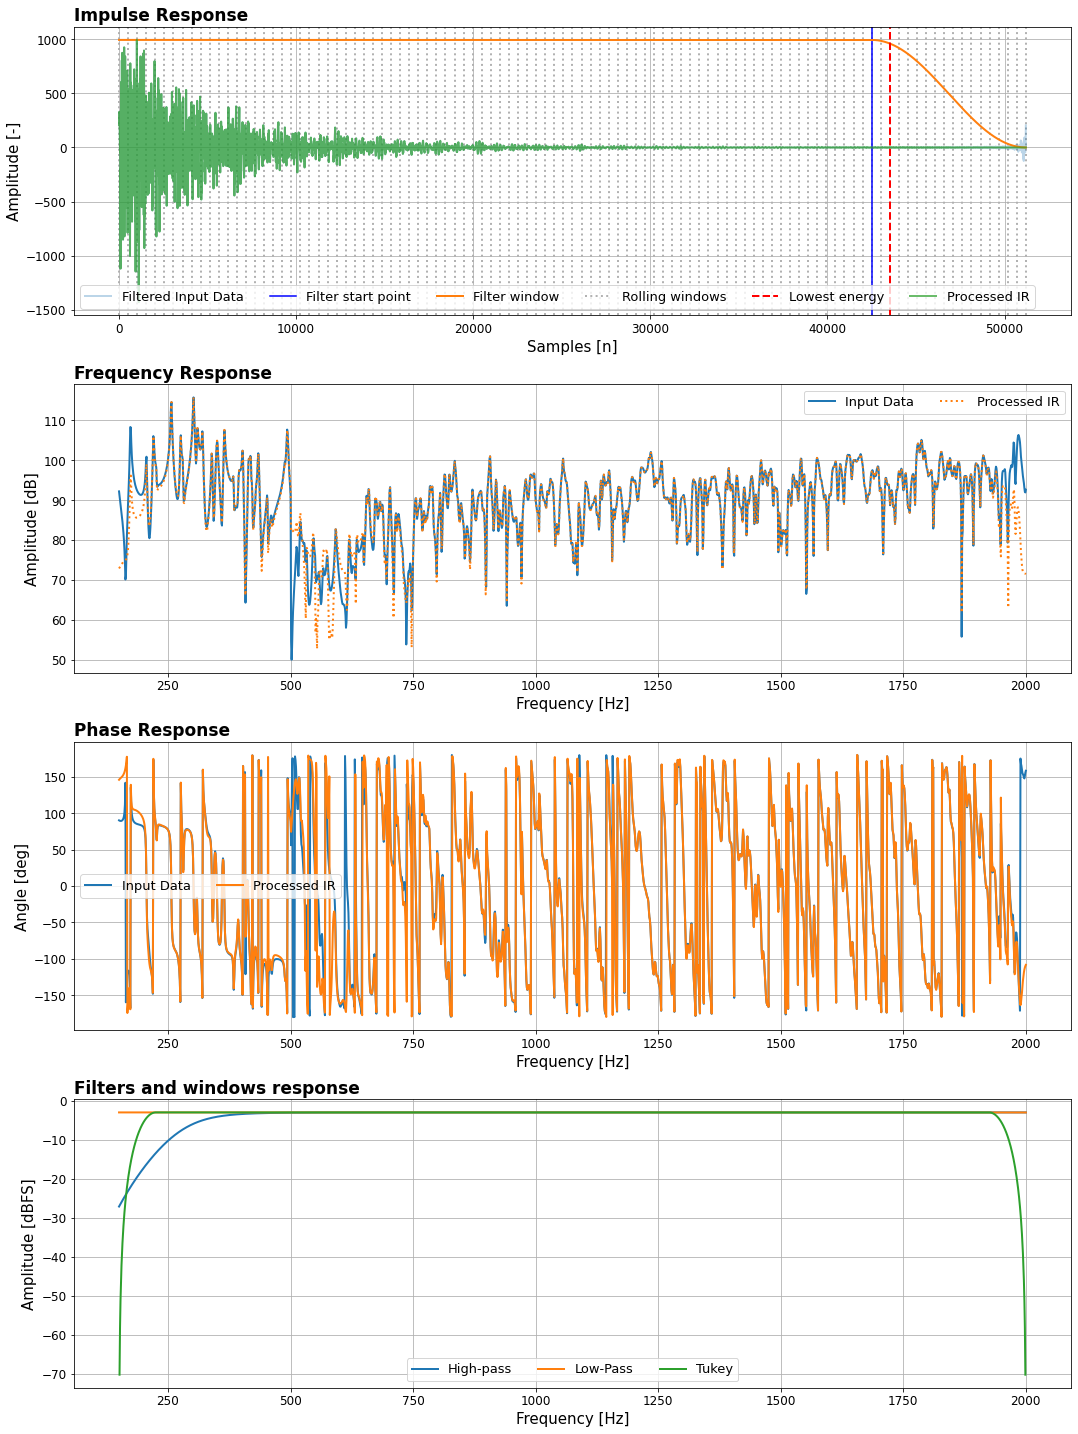

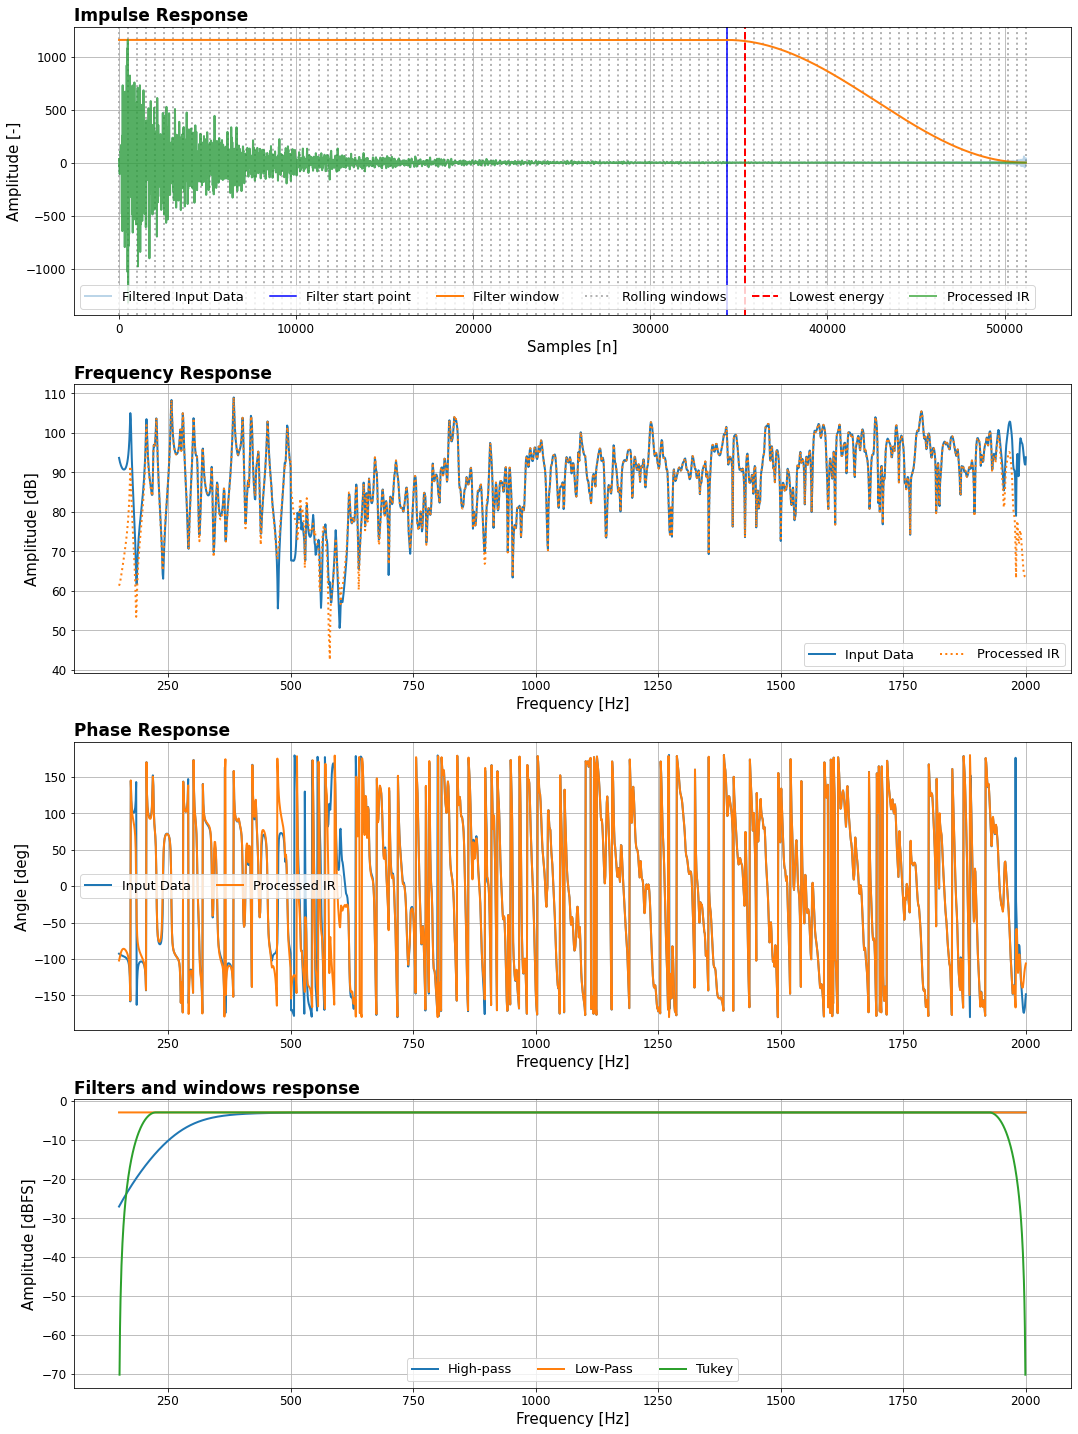

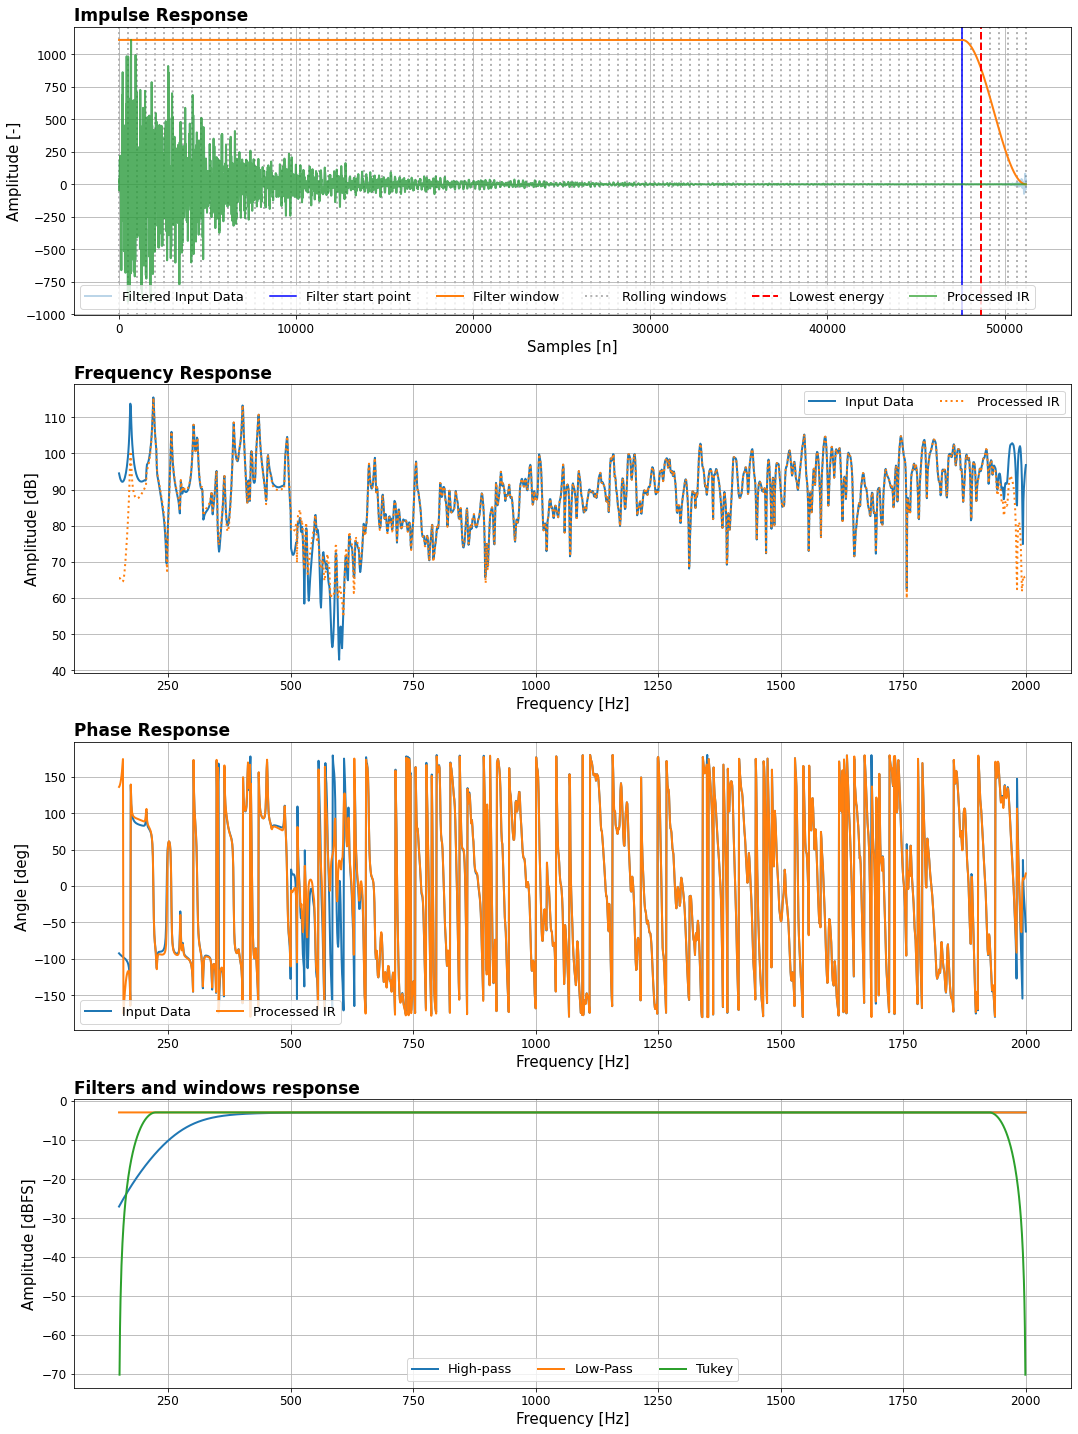

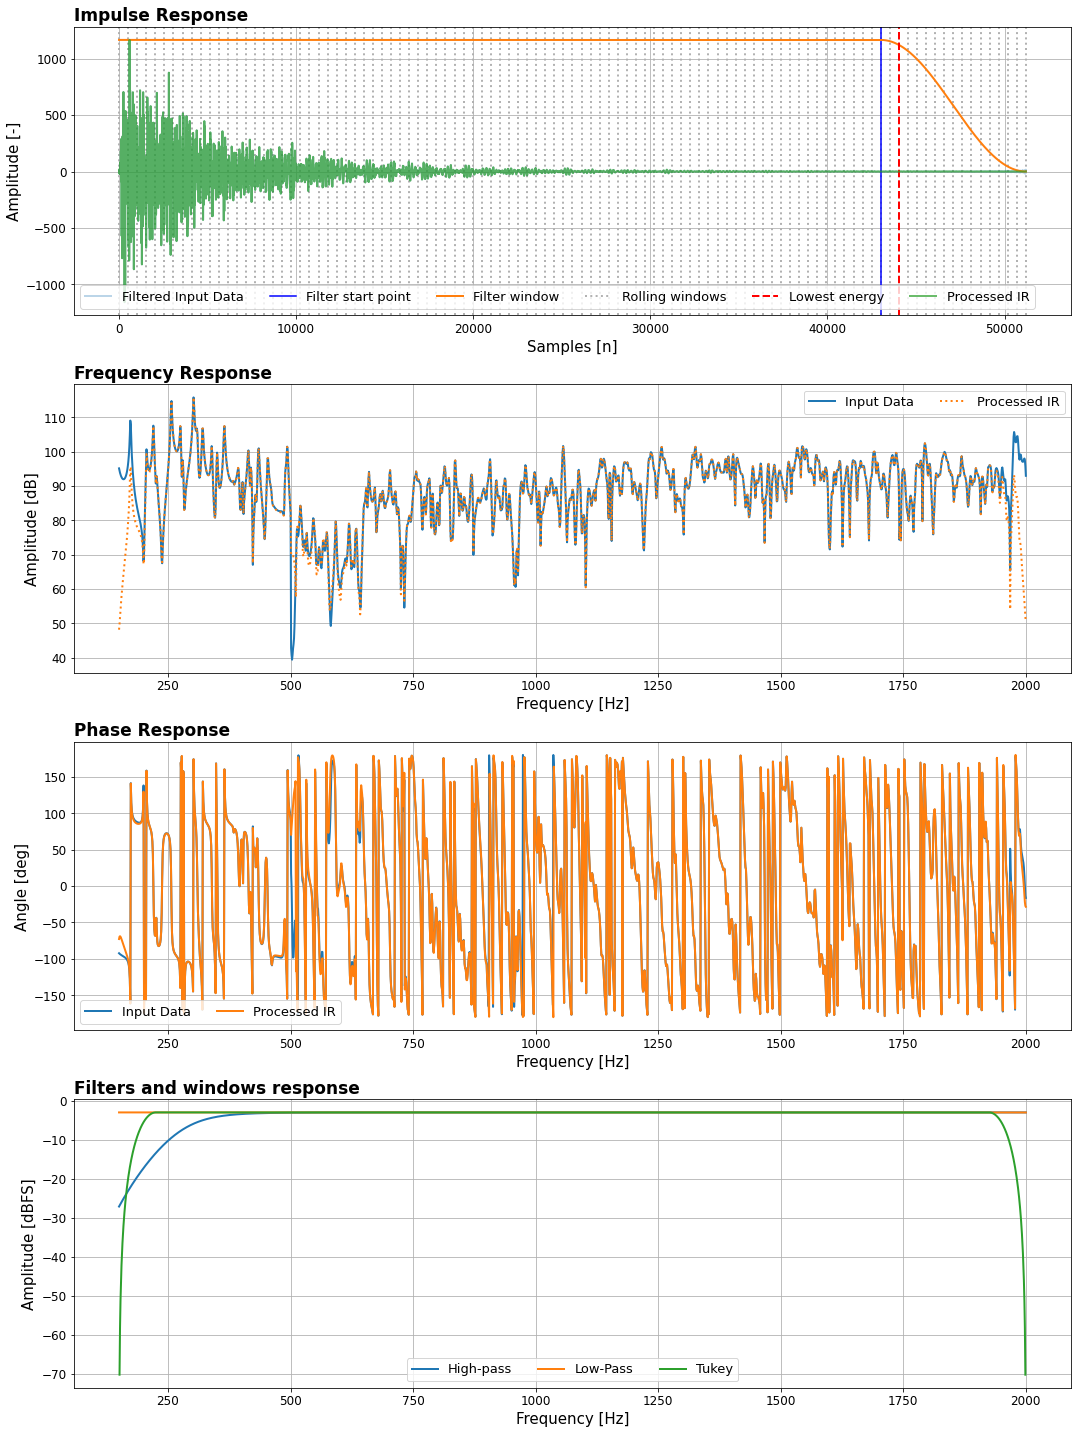

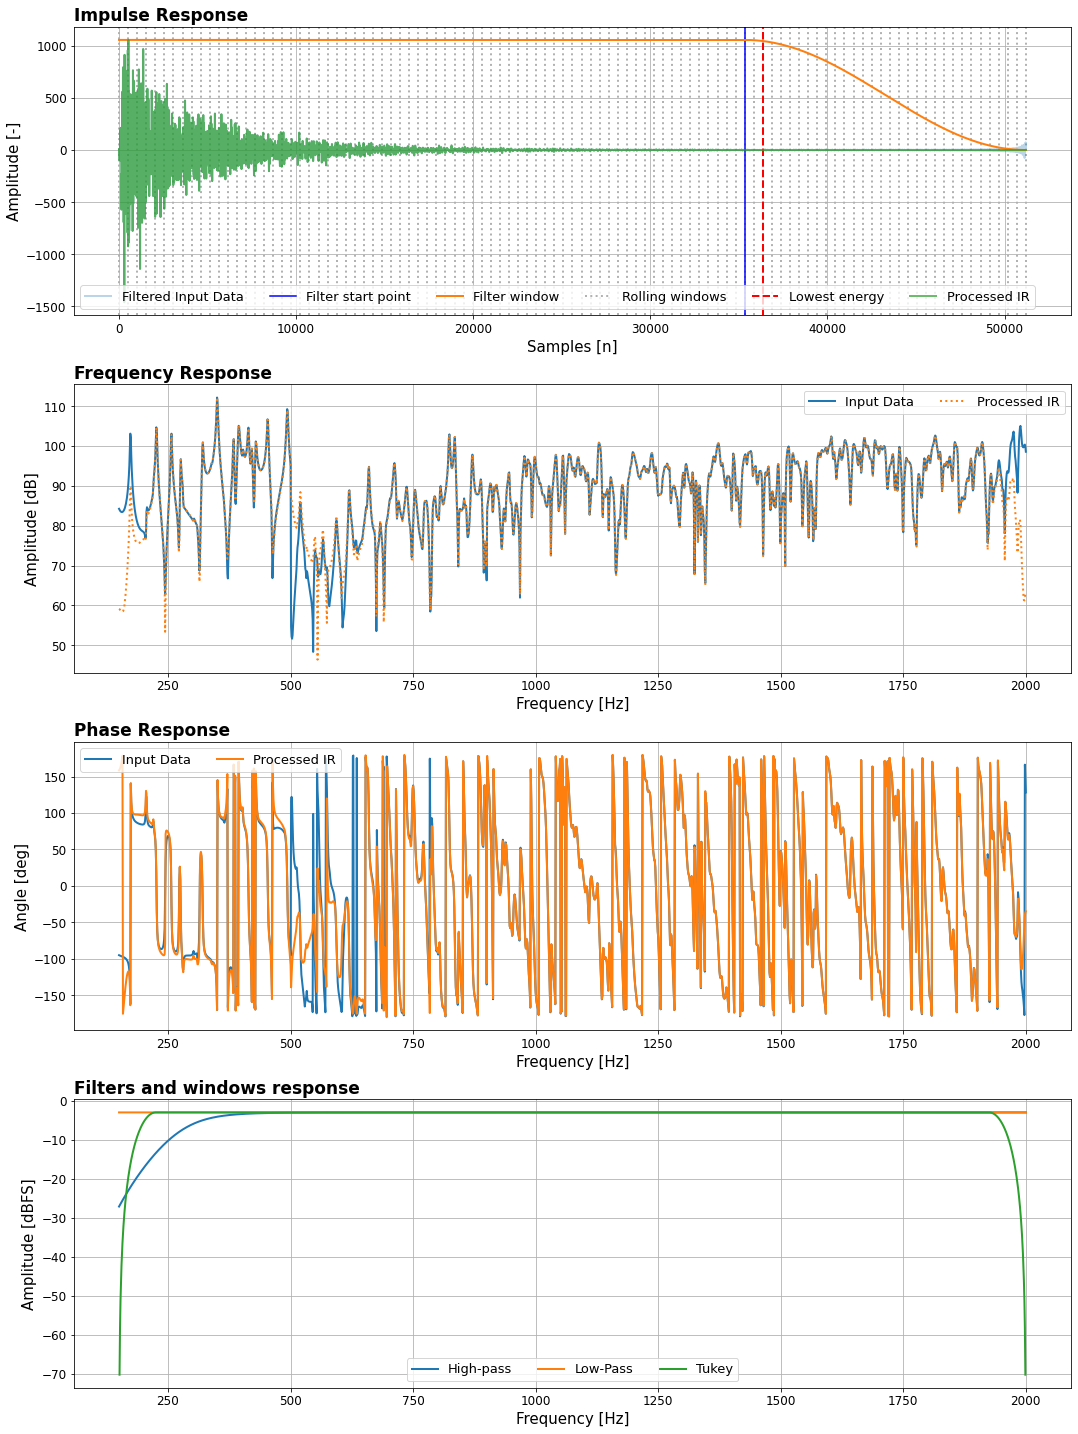

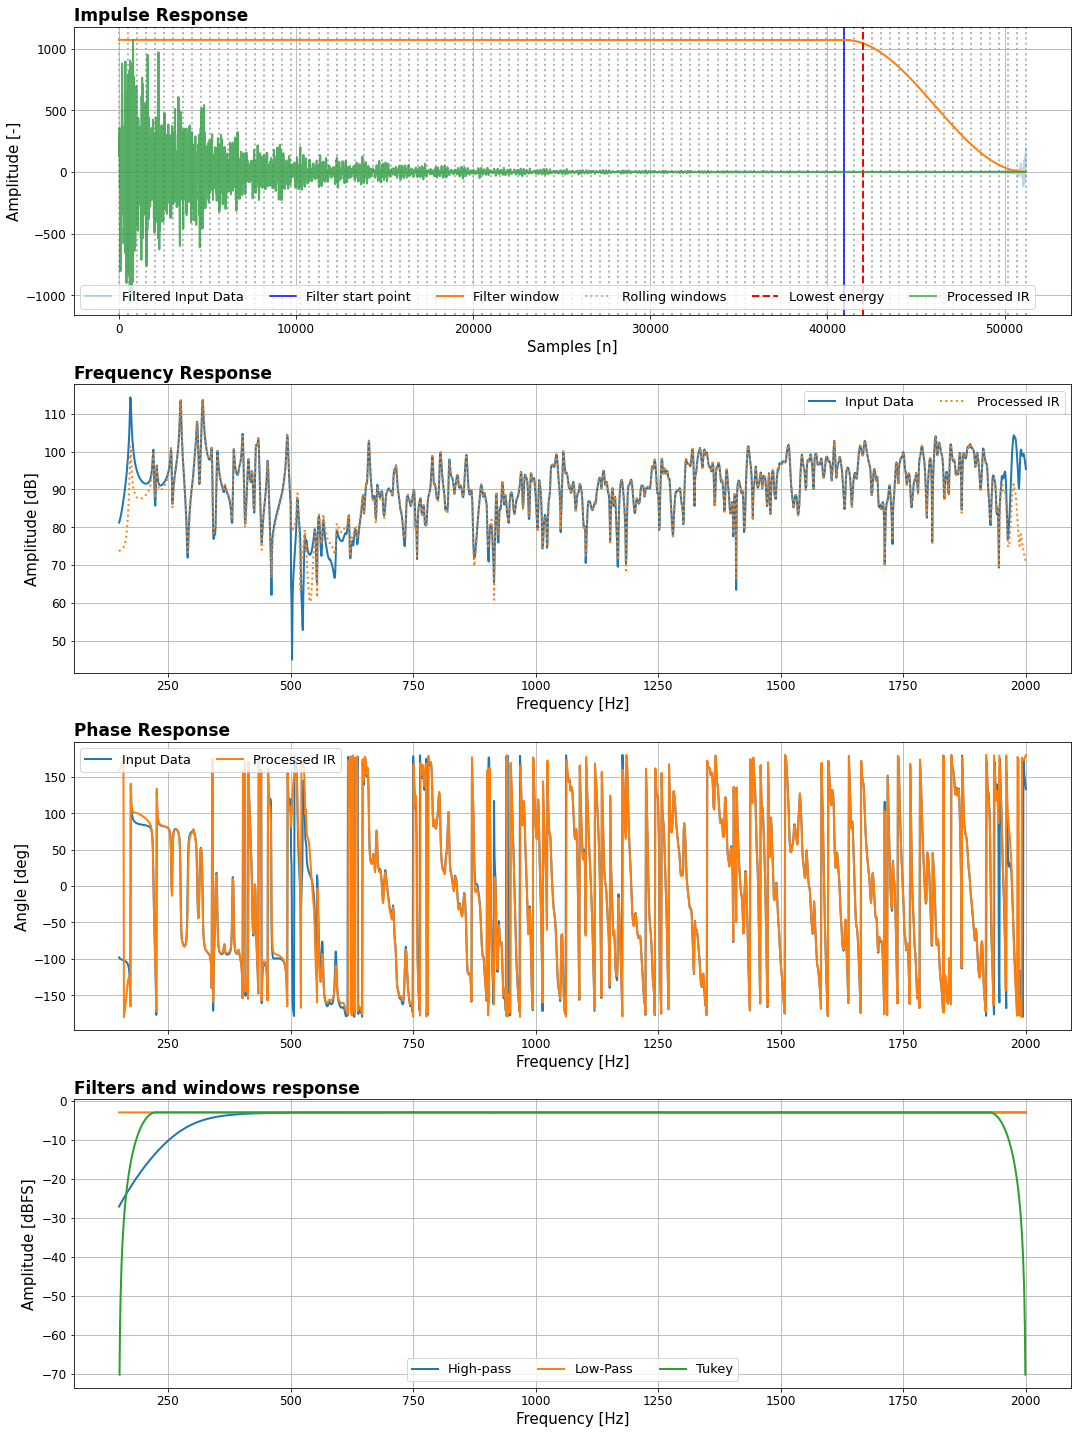

In [16]:
#%% Resposta Impulsiva
domain = fd.Domain(fmin, fmax,1,51200)
domain.alpha = 0.1
# ir = np.zeros((len(RI_comMat['RIs_sz']),len(pR[0,:])))
ir = np.zeros((51200,len(pR[0,:])))
for n in range(0,len(pR[0,:])):
    ir[:,n] = domain.compute_impulse_response(pR[:,n], view=True, irr_filters=False)


In [17]:
# Salvar os dados p importar no MATLAB
from scipy.io import savemat
savemat('G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\RIs_simuladas_Zs_soparedes_pR_df1hz.mat',{'RIs':ir,'freq':AC.freq})


In [ ]:

import pytta
txAmostragem = 51200 # [Hz]
# fftDegree = 19
# T = (2**fftDegree-1)/txAmostragem # [s]
# Cria vetor no tempo de um sinal aleatório
#meuRuido = np.random.randn(txAmostragem*T)
# SignalObj com sinal provido pelo usuário
RI_semMat = pytta.SignalObj(RI_semMat['RIs_sz'], 'time', txAmostragem) 
RI_semMat.plot_time_dB(yLim=[-100,30])

### Plote do campo de pressão

In [ ]:
import pickle
with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\codes\\dados-pickle\\simu_fluidoeq_1k_altares.pkl","rb") as arquivo:
  obj1 = pickle.load(arquivo)

Default Plotly renderer: jupyterlab


In [ ]:
# Plote do campo de pressão
obj1.pressure_field(frequencies = 400,renderer='browser',axis=['xy','yz'],saveFig=False,camera_angles=['diagonal_front'],extension='pdf')

G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\minicamara_menor\maisEspesso_comVol.geo


100%|██████████| 174/174 [00:00<00:00, 3740.06it/s]



	Elapsed time to evaluate acoustic field: 1.30 minutes



# Juntar dados simulados


In [48]:
obj3.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

In [93]:
R = fd.Receiver()
#R.coord = np.array([[0.33,0.23,0.21],[0.38,0.93,0.21],[0.92,0.95,0.21]]) 
R.coord = np.array([[1.057,0.695,0.282],[0.425,0.925,0.235],
                    [0.409,0.406,0.235],[0.336,0.677,0.282],
                    [0.685,0.965,0.235],[0.661,0.30,0.235]])
AP = fd.AirProperties(c0 = 343)

fmax = 2000 #2300
fmin = 150
AC = fd.AlgControls(AP,fmin,fmax,1)

In [8]:
import pickle
import pickle
with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_150_500_0_5.pkl","rb") as arquivo:
  obj1 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_500_900_0_5.pkl","rb") as arquivo:
  obj2 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_900_2k_0_5.pkl","rb") as arquivo:
  obj3 = pickle.load(arquivo)


with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_150_600_1.pkl","rb") as arquivo:
  obj1_1 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_601_1k_1.pkl","rb") as arquivo:
  obj2_1 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_1001_2k_1.pkl","rb") as arquivo:
  obj3_1 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\Zs_cte0_004_DBM_obj_Minicamara_150_2000_0_5.pkl","rb") as arquivo:
  obj_dbm = pickle.load(arquivo)

In [100]:
with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\Zs_cte0_004_DBM_obj_Minicamara_150_2000_0_5.pkl","rb") as arquivo:
  obj_dbm = pickle.load(arquivo)

In [108]:
obj1.evaluate(R)
obj2.evaluate(R)
obj3.evaluate(R)
obj1_1.evaluate(R)
obj2_1.evaluate(R)
obj3_1.evaluate(R)
obj_dbm.evaluate(R)

pR = np.concatenate((obj1.pR,obj2.pR[1:,:],obj3.pR[1:,:]))
pR1 = np.concatenate((obj1_1.pR,obj2_1.pR,obj3_1.pR))

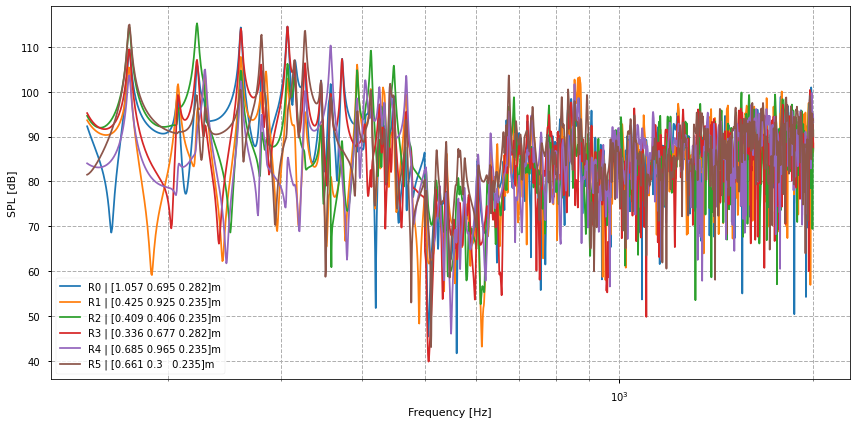

In [8]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj1.R.coord)==1:
  plt.semilogx(AC.freq, p2SPL(pR), linestyle='-', label=f'R | {obj1.R.coord[0]}m')
else:
  for i in range(len(obj1.R.coord)):
      plt.semilogx(AC.freq, p2SPL(pR[:,i]), linestyle='-', label=f'R{i} | {obj1.R.coord[i,:]}m')

if len(obj1.R.coord) > 1:
  pR_med = np.mean(pR,axis=1)
  #plt.semilogx(obj.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
#plt.title('SEM MATERIAL')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim((min(p2SPL(pR_med)),max(p2SPL((pR_med)))))
plt.tight_layout()
plt.show()

In [98]:
np.argwhere(R_comMat['freqVector']==150)

array([[1995,    0]], dtype=int64)

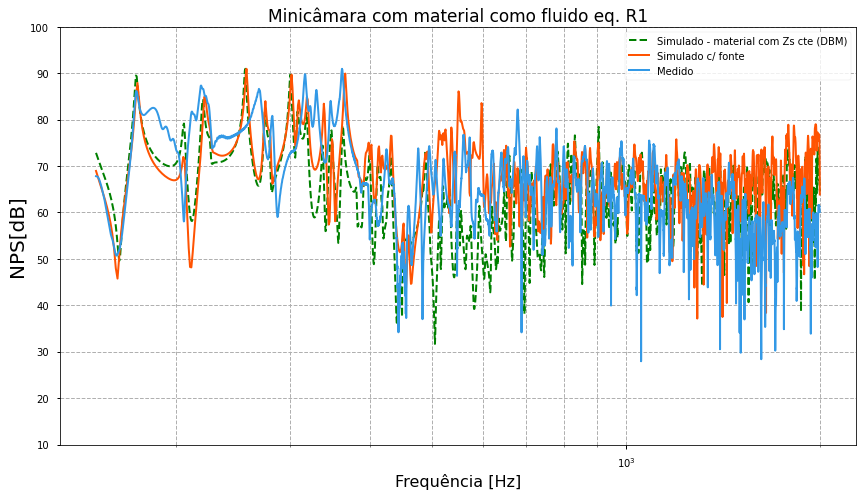

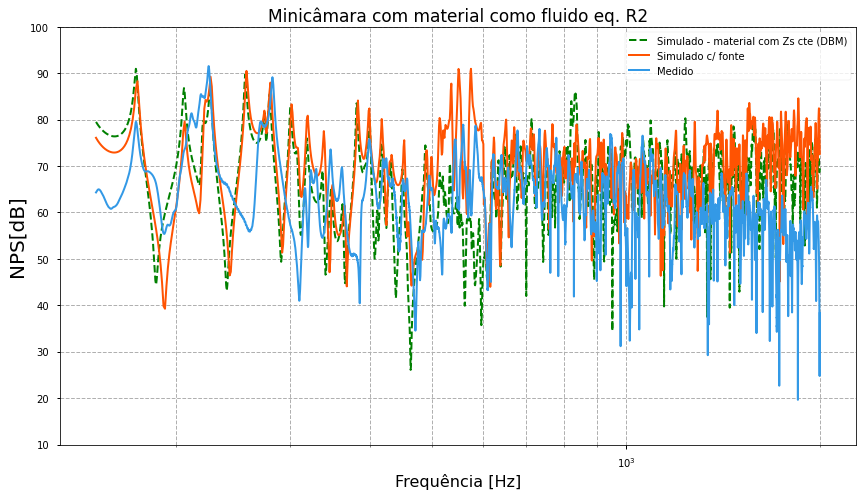

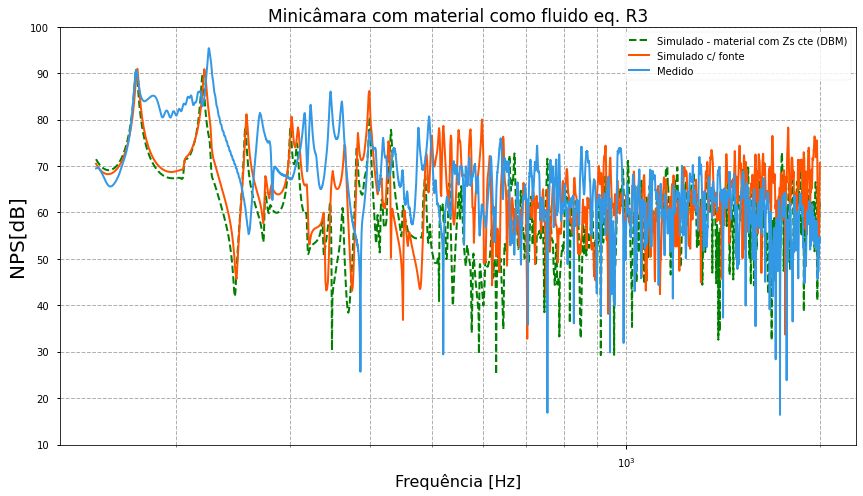

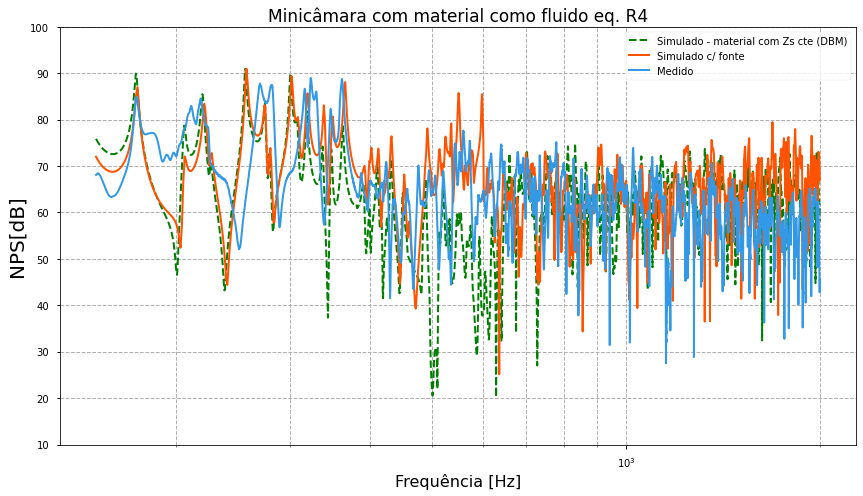

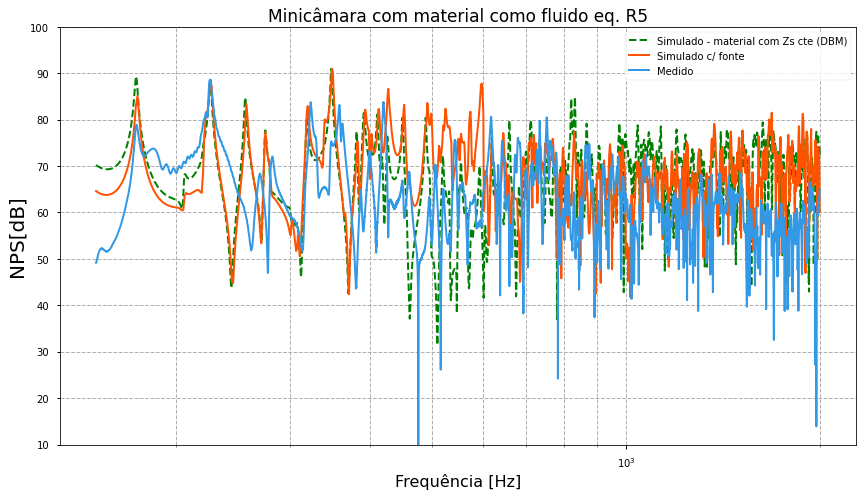

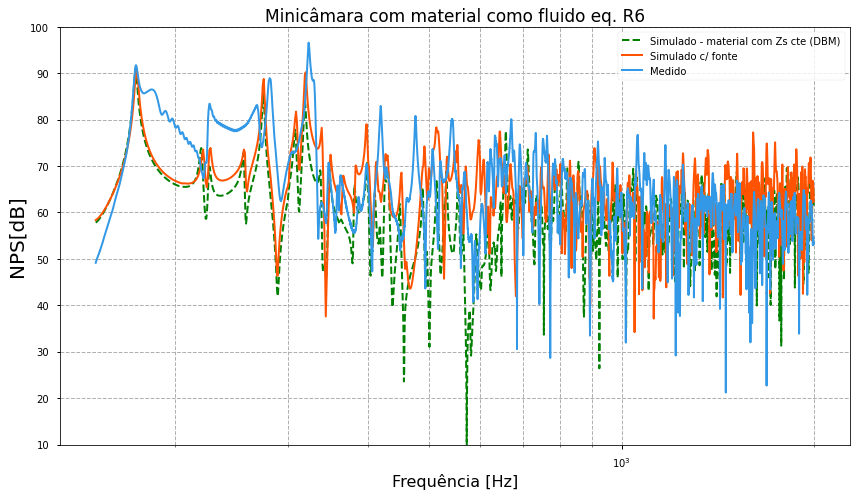

In [109]:
for n in range(0,6):
    plt.figure(figsize=(12,7)) #Simulado - material com Zs cte (DBM)
    #plt.semilogx(obj_dbm.freq, p2SPL(pR[:,n]/max(abs(pR[:,n]))),label='Simulado s/ fonte',color='#008000', linestyle='--', linewidth=2)
    plt.semilogx(obj_dbm.freq, p2SPL(obj_dbm.pR[:,n]/max(abs(obj_dbm.pR[:,n]))),label='Simulado - material com Zs cte (DBM)',color='#008000', linestyle='--', linewidth=2)
    plt.semilogx(AC.freq, p2SPL(pR1[:,n]/max(abs(pR1[:,n]))),label='Simulado c/ fonte',color='#ff5302', linestyle='-', linewidth=2)
    plt.semilogx(R_comMat['freqVector'][1995:26600,0], p2SPL(R_comMat['pts_freq'][1995:26600,n]/max(abs(R_comMat['pts_freq'][1995:26600,0]))), color=(0.2, 0.6, 0.9),linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara com material como fluido eq. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.ylim((0,0.2))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show()  

In [ ]:
plt.title('Com MATERIAL - média espacial')
pR_med = np.mean(obj.pR,axis=1) # R_semMat['R_semMatfreq'][2641:7921,n]
R_med = np.mean(R_comMat['pts_freq'][1981:26401],axis=1)
plt.semilogx(obj.freq, p2SPL(pR_med/max(abs(pR_med))), linestyle='--', label='Simulado', linewidth=2)
plt.semilogx(R_comMat['freqVector'][1981:26401,0], p2SPL(R_med/max(abs(R_med))), linestyle='-', label='Medido', linewidth=1)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
# plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

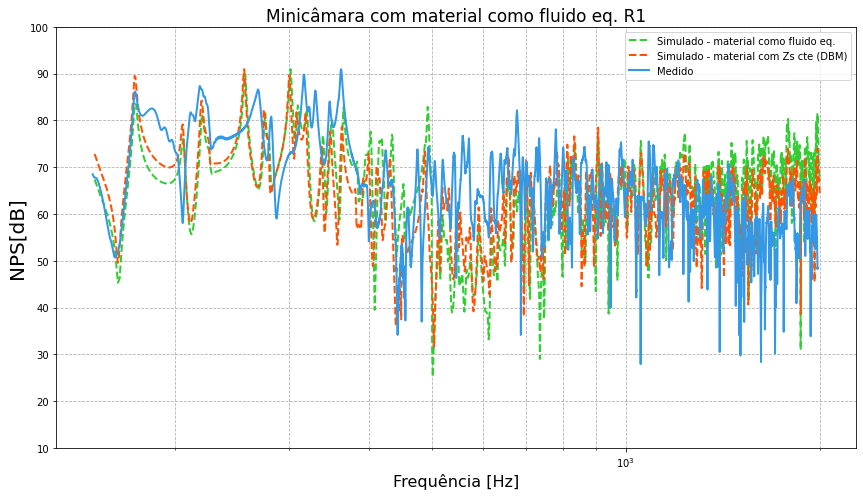

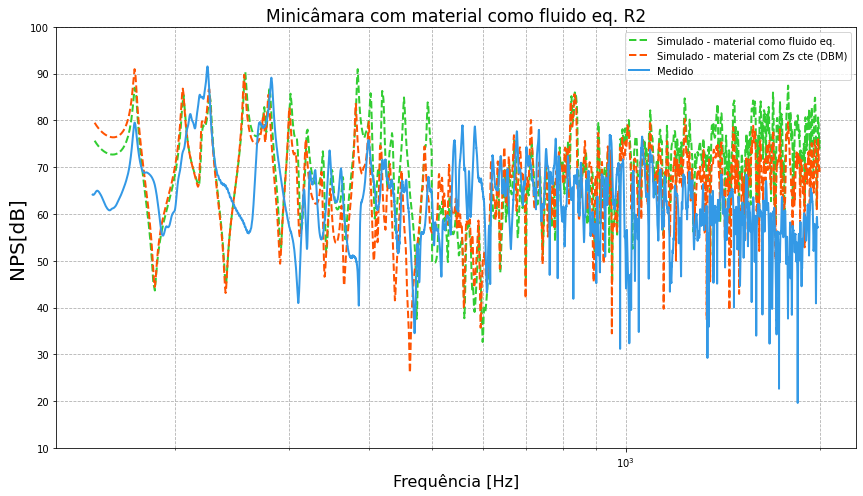

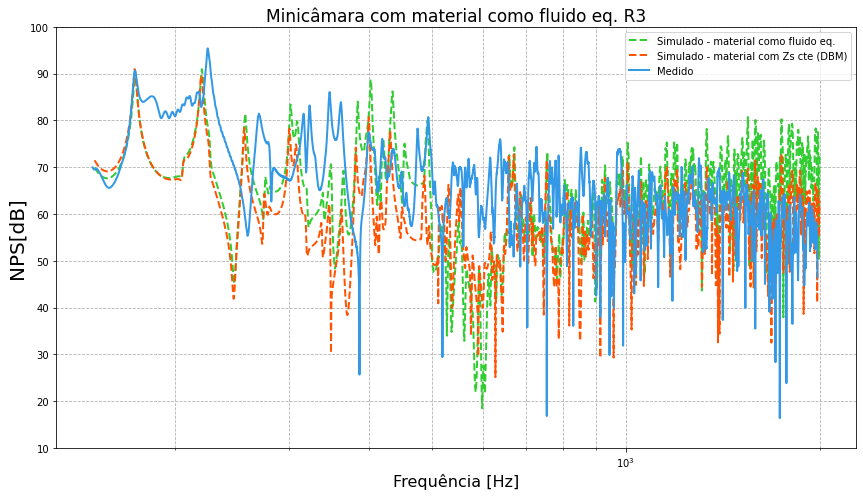

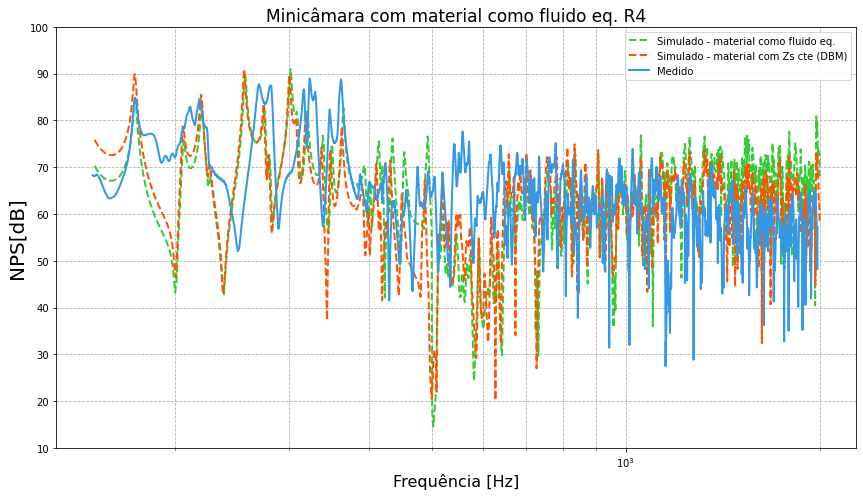

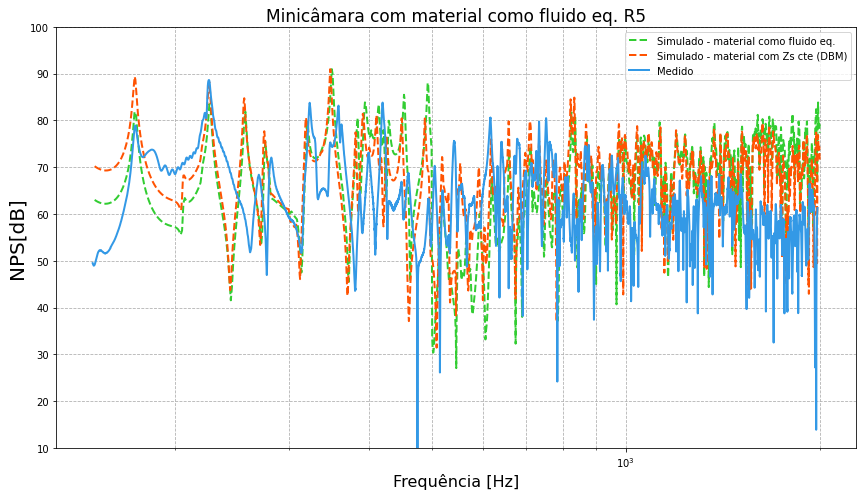

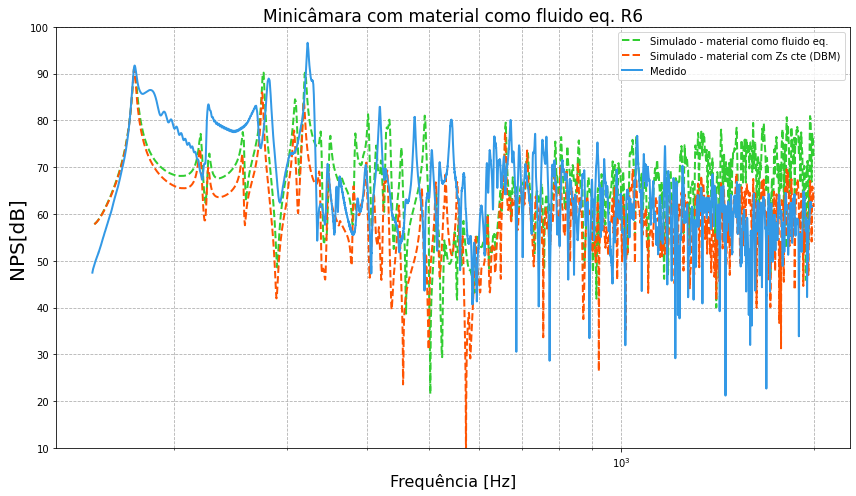

In [14]:
for n in range(0,6):
    plt.figure(figsize=(12,7))
    plt.semilogx(AC.freq, p2SPL(pR[:,n]/max(abs(pR[:,n]))),label='Simulado - material como fluido eq.',color='#32CD32', linestyle='--', linewidth=2)
    plt.semilogx(obj_dbm.freq, p2SPL(obj_dbm.pR[:,n]/max(abs(obj_dbm.pR[:,n]))),label='Simulado - material com Zs cte (DBM)',color='#ff5302', linestyle='--', linewidth=2)
    plt.semilogx(R_comMat['freqVector'][1981:26401,0], p2SPL(R_comMat['pts_freq'][1981:26401,n]/max(abs(R_comMat['pts_freq'][1981:26401,0]))), color=(0.2, 0.6, 0.9),linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara com material como fluido eq. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.ylim((0,0.2))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show()  